In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print("Columns in dataset:", df.columns)

drop_cols = ['Cabin','Name','Ticket','PassengerId']
df = df.drop([col for col in drop_cols if col in df.columns], axis=1)

df['Age'] = df['Age'].fillna(df['Age'].median())
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

le = LabelEncoder()
if 'Sex' in df.columns:
    df['Sex'] = le.fit_transform(df['Sex'])
if 'Embarked' in df.columns:
    df['Embarked'] = le.fit_transform(df['Embarked'])


Columns in dataset: Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [8]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=500),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(name, "Accuracy:", acc)


LogisticRegression Accuracy: 0.8100558659217877
DecisionTree Accuracy: 0.7877094972067039
RandomForest Accuracy: 0.7988826815642458
SVM Accuracy: 0.659217877094972
KNN Accuracy: 0.7039106145251397


In [11]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print("Best Model:", best_model_name, "with Accuracy:", results[best_model_name])


Best Model: LogisticRegression with Accuracy: 0.8100558659217877


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



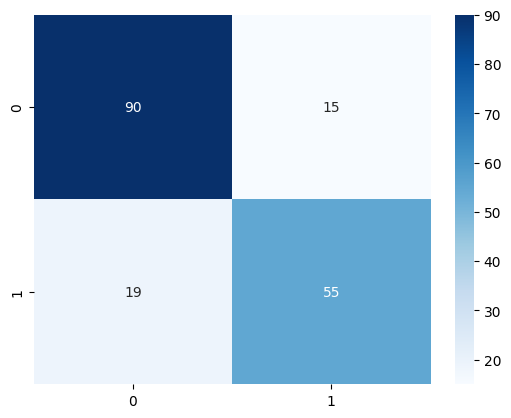

In [12]:
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()


In [13]:
sample = X_test.iloc[:5]
print("Sample Predictions:", best_model.predict(sample))
print("Actual:", y_test.iloc[:5].values)


Sample Predictions: [0 0 0 1 1]
Actual: [1 0 0 1 1]
